<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,33.021609,30.301252,64.515784,87.269915,-5.641759,219.466802,241.980744,-22.513942
1,0.0,1.0,35.556185,58.299431,76.960928,26.590550,-114.640204,92.766890,165.640606,-72.873716
2,0.0,2.0,67.657280,77.463880,76.635857,98.315951,-41.917733,288.155236,204.177073,83.978162
3,0.0,3.0,52.749728,63.484348,98.035108,68.786779,-130.330456,162.725506,221.809619,-59.084113
4,0.0,4.0,71.304483,59.662840,69.535109,37.383252,-51.045830,196.839854,171.163192,25.676662
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.035658,30.711627,95.429879,28.334081,13.736017,230.247262,183.293357,46.953905
19996,999.0,16.0,76.500422,54.602599,32.800088,80.648450,154.271955,408.823514,245.323519,163.499995
19997,999.0,17.0,99.702550,82.159613,57.375039,91.816762,114.922870,455.976835,423.834021,32.142814
19998,999.0,18.0,67.746661,81.569871,64.741770,75.017782,446.218002,745.294085,394.874023,350.420062


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    33.021609  30.301252  64.515784  87.269915   -5.641759   
      1.0    35.556185  58.299431  76.960928  26.590550 -114.640204   
      2.0    67.657280  77.463880  76.635857  98.315951  -41.917733   
      3.0    52.749728  63.484348  98.035108  68.786779 -130.330456   
      4.0    71.304483  59.662840  69.535109  37.383252  -51.045830   
...                ...        ...        ...        ...         ...   
999.0 15.0   52.035658  30.711627  95.429879  28.334081   13.736017   
      16.0   76.500422  54.602599  32.800088  80.648450  154.271955   
      17.0   99.702550  82.159613  57.375039  91.816762  114.922870   
      18.0   67.746661  81.569871  64.741770  75.017782  446.218002   
      19.0   86.052575  65.949260  26.163774  90.593058  -38.007998   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    219.466802  241.980744  -22.513942  
      1.0     92.766890  165.640606  -72.873716  
      2.0    288.155236  204.177073   83.978162  
      3.0    162.725506  221.809619  -59.084113  
      4.0    196.839854  171.163192   25.676662  
...                 ...         ...         ...  
999.0 15.0   230.247262  183.293357   46.953905  
      16.0   408.823514  245.323519  163.499995  
      17.0   455.976835  423.834021   32.142814  
      18.0   745.294085  394.874023  350.420062  
      19.0   240.750669  295.655115  -54.904445  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    33.021609  30.301252  64.515784  87.269915   -5.641759   
      1.0    35.556185  58.299431  76.960928  26.590550 -114.640204   
      2.0    67.657280  77.463880  76.635857  98.315951  -41.917733   
      3.0    52.749728  63.484348  98.035108  68.786779 -130.330456   
      4.0    71.304483  59.662840  69.535109  37.383252  -51.045830   
...                ...        ...        ...        ...         ...   
999.0 15.0   52.035658  30.711627  95.429879  28.334081   13.736017   
      16.0   76.500422  54.602599  32.800088  80.648450  154.271955   
      17.0   99.702550  82.159613  57.375039  91.816762  114.922870   
      18.0   67.746661  81.569871  64.741770  75.017782  446.218002   
      19.0   86.052575  65.949260  26.163774  90.593058  -38.007998   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    219.466802  241.980744  -22.513942  
      1.0     92.766890  165.640606  -72.873716  
      2.0    288.155236  204.177073   83.978162  
      3.0    162.725506  221.809619  -59.084113  
      4.0    196.839854  171.163192   25.676662  
...                 ...         ...         ...  
999.0 15.0   230.247262  183.293357   46.953905  
      16.0   408.823514  245.323519  163.499995  
      17.0   455.976835  423.834021   32.142814  
      18.0   745.294085  394.874023  350.420062  
      19.0   240.750669  295.655115  -54.904445  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,33.021609,30.301252,64.515784,87.269915,-5.641759,219.466802,241.980744,-22.513942
1,0.0,1.0,35.556185,58.299431,76.960928,26.590550,-114.640204,92.766890,165.640606,-72.873716
2,0.0,2.0,67.657280,77.463880,76.635857,98.315951,-41.917733,288.155236,204.177073,83.978162
3,0.0,3.0,52.749728,63.484348,98.035108,68.786779,-130.330456,162.725506,221.809619,-59.084113
4,0.0,4.0,71.304483,59.662840,69.535109,37.383252,-51.045830,196.839854,171.163192,25.676662
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.035658,30.711627,95.429879,28.334081,13.736017,230.247262,183.293357,46.953905
19996,999.0,16.0,76.500422,54.602599,32.800088,80.648450,154.271955,408.823514,245.323519,163.499995
19997,999.0,17.0,99.702550,82.159613,57.375039,91.816762,114.922870,455.976835,423.834021,32.142814
19998,999.0,18.0,67.746661,81.569871,64.741770,75.017782,446.218002,745.294085,394.874023,350.420062


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    33.021609  30.301252  64.515784  87.269915   -5.641759   
      1.0    35.556185  58.299431  76.960928  26.590550 -114.640204   
      2.0    67.657280  77.463880  76.635857  98.315951  -41.917733   
      3.0    52.749728  63.484348  98.035108  68.786779 -130.330456   
      4.0    71.304483  59.662840  69.535109  37.383252  -51.045830   
...                ...        ...        ...        ...         ...   
999.0 15.0   52.035658  30.711627  95.429879  28.334081   13.736017   
      16.0   76.500422  54.602599  32.800088  80.648450  154.271955   
      17.0   99.702550  82.159613  57.375039  91.816762  114.922870   
      18.0   67.746661  81.569871  64.741770  75.017782  446.218002   
      19.0   86.052575  65.949260  26.163774  90.593058  -38.007998   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    219.466802  241.980744  -22.513942  
      1.0     92.766890  165.640606  -72.873716  
      2.0    288.155236  204.177073   83.978162  
      3.0    162.725506  221.809619  -59.084113  
      4.0    196.839854  171.163192   25.676662  
...                 ...         ...         ...  
999.0 15.0   230.247262  183.293357   46.953905  
      16.0   408.823514  245.323519  163.499995  
      17.0   455.976835  423.834021   32.142814  
      18.0   745.294085  394.874023  350.420062  
      19.0   240.750669  295.655115  -54.904445  

[20000 rows x 8 columns]

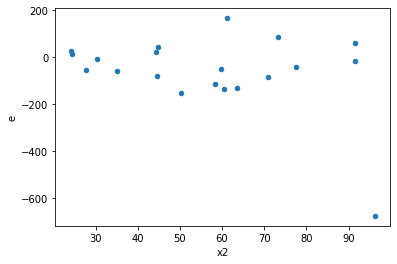

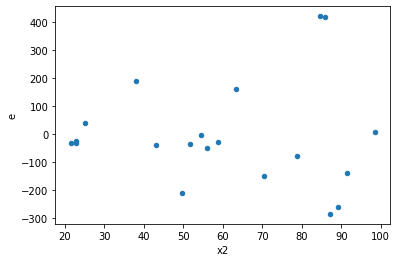

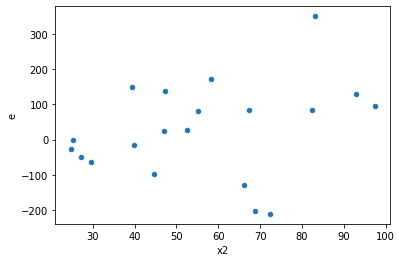

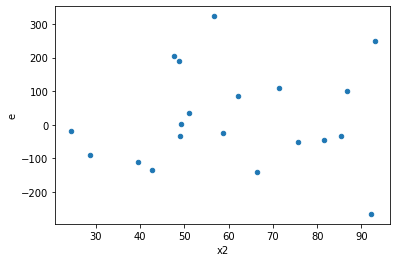

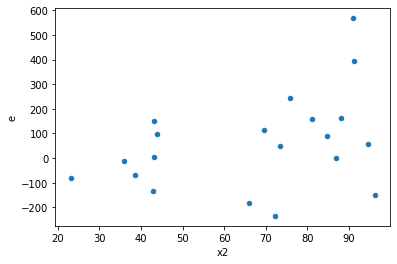

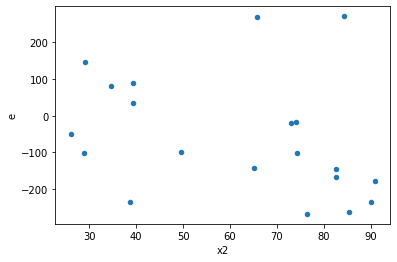

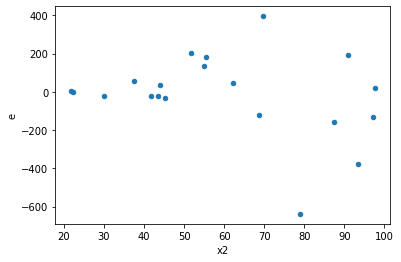

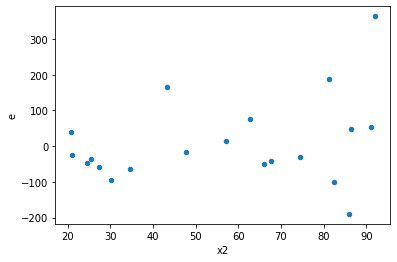

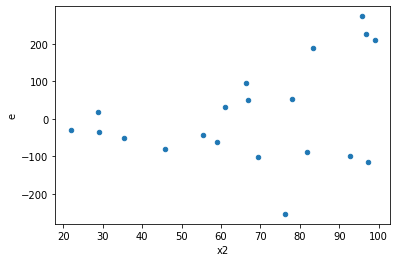

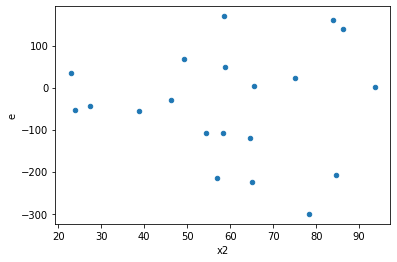

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,8.0,4.0,99981.04541372586,160788.0789892744,12497.630676715733,40197.0197473186,3.2163712296451075,0.27408402462116643,0.8629579876894168,0.13704201231058322,Reject005=1 : Homoscedasticity
14.0,5.0,7.0,50141.96480694473,202912.4576055811,10028.392961388945,28987.49394365444,2.8905422888055274,0.19899672938660418,0.9005016353066979,0.09949836469330209,Reject005=1 : Homoscedasticity
16.0,2.0,10.0,1348.317133218621,171300.44671702848,674.1585666093105,17130.044671702846,25.409518650573016,0.0002403434485844791,0.9998798282757078,0.00012017172429223955,Reject005=0 : Heteroscedasticity
17.0,4.0,8.0,13527.480536496345,133980.83694773575,3381.8701341240862,16747.60461846697,4.952172601034737,0.05272873643779019,0.9736356317811049,0.026364368218895096,Reject005=1 : Homoscedasticity
18.0,3.0,9.0,8563.726197351041,159494.58062578586,2854.5753991170136,17721.620069531764,6.208145728087432,0.028478999631003532,0.9857605001844982,0.014239499815501766,Reject005=0 : Heteroscedasticity
19.0,10.0,2.0,41848.886727487,16531.35080830433,4184.8886727487,8265.675404152165,1.9751243224167159,0.7652422592267991,0.6173788703866004,0.38262112961339956,Reject005=1 : Homoscedasticity
20.0,3.0,9.0,22529.558290128178,116802.7145821044,7509.85276337606,12978.0793980116,1.7281403253740084,0.4610556643340915,0.7694721678329542,0.23052783216704575,Reject005=1 : Homoscedasticity
21.0,9.0,3.0,90356.44940115428,85700.7355131204,10039.605489017144,28566.911837706797,2.845421751776766,0.4214267369870033,0.7892866315064984,0.21071336849350164,Reject005=1 : Homoscedasticity
22.0,2.0,10.0,6877.301642967769,255139.19235752756,3438.6508214838846,25513.919235752757,7.419747034606646,0.021150287063512074,0.989424856468244,0.010575143531756037,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,5.0,323695.74753657414,12076.743543975768,46242.24964808202,2415.3487087951535,0.0522325087377174,0.0011815354880912014,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,468108.97648140165,61632.2986501221,78018.16274690027,10272.04977502035,0.1316622875155884,0.026255733063958765,Reject005=0 : Heteroscedasticity
2.0,5.0,7.0,83638.02227910027,38956.91159424043,16727.604455820056,5565.27308489149,0.33269994514696677,0.24381115326571406,Reject005=1 : Homoscedasticity
3.0,5.0,7.0,104213.32428897175,88088.749944491,20842.66485779435,12584.107134927286,0.6037667074141586,0.5983259462111754,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,182272.81865119396,112525.08210715068,30378.803108532327,18754.18035119178,0.617344280621918,0.572661116878122,Reject005=1 : Homoscedasticity
5.0,7.0,5.0,205891.4062315049,25071.40214659219,29413.058033072128,5014.280429318438,0.17047803814483917,0.03822686689336244,Reject005=0 : Heteroscedasticity
6.0,5.0,7.0,247069.8271082295,40571.698349526734,49413.9654216459,5795.956907075248,0.11729390381076997,0.03134370278030797,Reject005=0 : Heteroscedasticity
7.0,4.0,8.0,162200.9909328366,59217.51997585356,40550.24773320915,7402.189996981695,0.182543644262858,0.1179386947714664,Reject005=1 : Homoscedasticity
8.0,5.0,7.0,85132.10448987424,105563.53011890133,17026.420897974847,15080.50430270019,0.8857119410512101,0.9257969539546416,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      717
Reject005=0 : Heteroscedasticity    283
Name: Result_test, dtype: int64